In [1]:
import pandas as pd

In [2]:
anp = pd.read_pickle("../../data/Visual_well_being/anp.pickle").drop_duplicates()

In [3]:
anp.head()

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
0,951727030670259635_143763900,hot_boys,0.017,0.1760,amazement
1,951727030670259635_143763900,young_couple,0.019,0.2113,joy
2,951727030670259635_143763900,dirty_laundry,-0.263,0.0929,joy
3,951727030670259635_143763900,global_mall,-0.031,0.1304,interest
4,951728575726873168_289794729,high_boots,0.025,0.1394,amazement


In [4]:
anp.shape

(208647, 5)

In [5]:
anp.drop_duplicates().shape

(208647, 5)

In [6]:
x = anp.drop_duplicates().groupby(["image_id","anp_label"]).count()
x[x.anp_sentiment > 1].shape

(1873, 3)

In [7]:
xx = x[x.anp_sentiment > 1].reset_index().drop(["anp_sentiment","emotion_score","emotion_label"],axis=1)
xx.head()

,image_id,anp_label
0,1000274724534075940_21697543,medical_illustration
1,1000341616620689887_183823541,cold_cave
2,1001532182445350573_46329534,small_dog
3,1001633872824374035_703978203,single_deck
4,1002278437580234552_395595054,small_dog


In [8]:
l = anp.image_id.isin(xx.image_id) & anp.anp_label.isin(xx.anp_label)

anp2 = anp[~l]


In [9]:
anp2.head(1)

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
0,951727030670259635_143763900,hot_boys,0.017,0.176,amazement


In [43]:
anp2[anp2.anp_label == "abandoned_area"]

,image_id,anp_label,anp_sentiment,emotion_score,emotion_label
289182,1071012848910930537_372088523,abandoned_area,-0.098,0.1781,amazement


In [10]:
q = anp2.pivot(index="image_id",columns="anp_label",values="anp_sentiment").reset_index().rename_axis("",axis=1).fillna(0)

In [11]:
q.head()

,image_id,abandoned_area,abandoned_asylum,abandoned_boat,abandoned_building,abandoned_car,abandoned_castle,abandoned_cemetery,abandoned_church,abandoned_city,...,young_model,young_money,young_people,young_person,young_street,young_talents,young_woman,young_women,young_workers,yummy_food
0,1000004599066965477_545497348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000059425592054064_703978203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000065308809420330_46329534,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000080765059521113_31736205,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1000097452173278518_206726006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
cols = []
counts = []

for col in q.columns:
    count = sum(q[col] != 0)
    
    cols.append(col)
    counts.append(count)

In [42]:
col_counts = pd.DataFrame({"col":cols,"count":counts})
col_counts.to_excel("ANP_topics_counts.xls")

In [70]:
train = q.drop("image_id",axis=1)[include_list_3]

from sklearn.decomposition import PCA
model = PCA(n_components=35)
pca = model.fit(train)

In [71]:
import numpy as np
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained_Variance'])
variance_ratios.Explained_Variance.sum()

0.8029

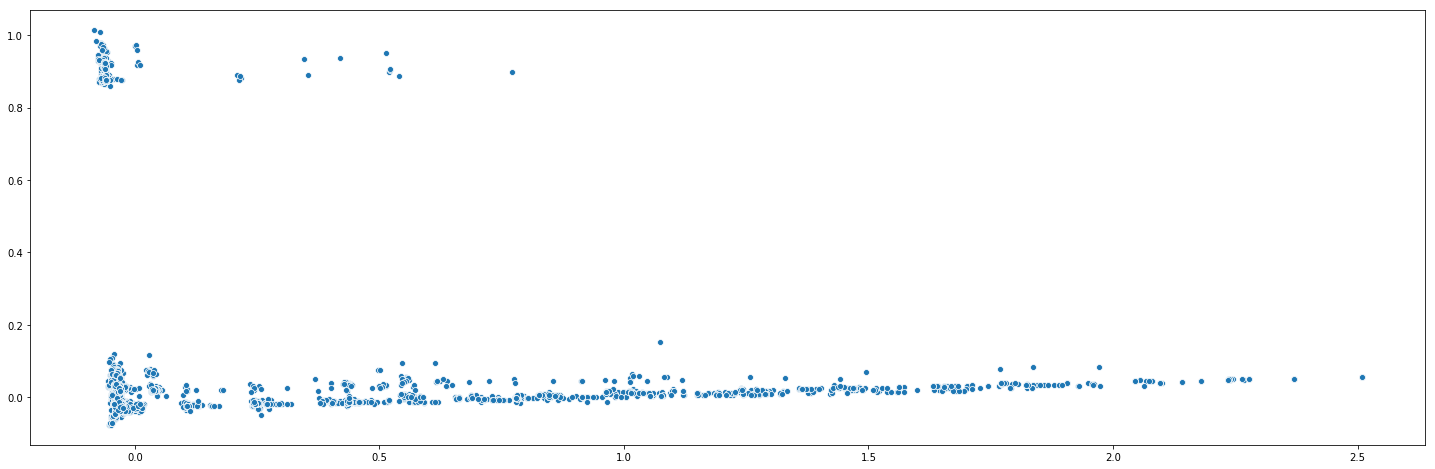

In [60]:
plt.figure(figsize=(25,8))
sns.scatterplot(x=pca_samples[:,0],y=pca_samples[:,1])

0.7804

In [63]:
len(include_list_3)

211

In [58]:
include_list_3 = [
"inspirational_quotes",
"funny_quotes",
"true_story",
"fake_vintage",
"silly_faces",
"cute_dog",
"wise_words",
"fake_lomo",
"cute_cat",
"sour_cream",
"comic_life",
"real_talk",
"comic_sans",
"real_food",
"healthy_food",
"cute_baby",
"mixed_breed",
"cute_couple",
"cute_guy",
"inspiring_quotes",
"grilled_chicken",
"happy_baby",
"grand_baby",
"hot_sauce",
"funny_cats",
"classic_toy",
"sexy_boy",
"dyed_hair",
"fitting_room",
"good_day",
"funny_signs",
"big_glasses",
"funny_dog",
"hot_guys",
"dynamic_light",
"bad_sign",
"baked_goods",
"hot_site",
"dark_chocolate",
"straight_hair",
"compact_disc",
"short_sale",
"raw_food",
"impossible_project",
"visual_identity",
"visual_journal",
"sexy_man",
"sweet_tea",
"bad_hair",
"rounded_corners",
"sleepy_dog",
"old_friends",
"happy_couple",
"grumpy_cat",
"beautiful_baby",
"colorful_hair",
"smiling_baby",
"cute_kitty",
"good_food",
"natural_hair",
"mad_magazine",
"ugly_sweater",
"funny_stuff",
"happy_birthday",
"hot_drink",
"plastic_surgery",
"short_stories",
"temporary_tattoos",
"sweet_baby",
"double_exposition",
"crazy_face",
"hairless_cat",
"hot_men",
"sticky_notes",
"traditional_food",
"frozen_food",
"happy_holidays",
"double_portrait",
"early_days",
"late_dinner",
"ornery_cats",
"raw_milk",
"domestic_shorthair",
"fluffy_cat",
"hairy_chest",
"stuffed_animal",
"chubby_cheeks",
"essential_oils",
"messy_room",
"positive_vibes",
"great_grandmother",
"plastic_bullet",
"spicy_food",
"funny_face",
"sexy_guy",
"sad_quotes",
"wavy_hair",
"global_gathering",
"little_cat",
"messy_hair",
"old_phone",
"crazy_quilt",
"cute_kitten",
"healthy_recipe",
"small_press",
"ugly_doll",
"rocky_road",
"happy_girl",
"hot_boys",
"unconditional_love",
"lazy_dog",
"newborn_baby",
"silly_hat",
"great_day",
"magic_hat",
"funny_tshirts",
"weird_food",
"cute_puppy",
"pretty_lights",
"visual_diary",
"cute_boy",
"happy_halloween",
"hot_wings",
"colored_hair",
"happy_cat",
"traditional_tattoo",
"comic_strip",
"silly_cat",
"crazy_eyes",
"crazy_hair",
"cute_food",
"handsome_guy",
"natural_soap",
"sexy_men",
"cute_kids",
"hot_girls",
"dirty_feet",
"sticky_rice",
"magnetic_poetry",
"original_artwork",
"visual_communication",
"cold_beer",
"cuddly_toy",
"healthy_eating",
"soft_pastel",
"holy_spirit",
"stuffed_bear",
"great_grandfather",
"little_monsters",
"good_friends",
"happy_dog",
"fat_cat",
"fake_eyelashes",
"soft_grunge",
"young_money",
"fake_tattoo",
"good_dog",
"yummy_food",
"dead_eyes",
"light_rain",
"used_books",
"warning_sign",
"little_boy",
"fat_cap",
"old_dog",
"sour_cherry",
"formal_night",
"colorful_sky",
"final_cut",
"experimental_music",
"happy_days",
"last_night",
"raw_fish",
"rainy_night",
"antique_books",
"cold_brew",
"crazy_cat",
"bad_dog",
"fake_food",
"lovely_ladies",
"fake_moustache",
"sweet_treats",
"happy_ending",
"modern_family",
"old_books",
"medical_marijuana",
"plastic_cup",
"waiting_room",
"modern_quilt",
"cold_process",
"cute_face",
"golden_labrador",
"good_boy",
"original_painting",
"alarm_clock",
"old_days",
"blank_book",
"big_smile",
"lazy_bear",
"silver_tabby",
"unique_gifts",
"cold_drink",
"old_signs",
"colored_pencil",
"great_grandpa",
"big_screen",
"cold_porcelain",
"funny_hats",
"pastel_hair",
"bad_guy",
"real_love"]

In [53]:
include_list_2 = [
"inspirational_quotes",
"funny_quotes",
"true_story",
"fake_vintage",
"silly_faces",
"cute_dog",
"wise_words",
"fake_lomo",
"cute_cat",
"sour_cream",
"comic_life",
"real_talk",
"comic_sans",
"real_food",
"healthy_food",
"cute_baby",
"mixed_breed",
"cute_couple",
"cute_guy",
"inspiring_quotes",
"grilled_chicken",
"happy_baby",
"grand_baby",
"hot_sauce",
"funny_cats",
"classic_toy",
"sexy_boy",
"dyed_hair",
"fitting_room",
"good_day",
"funny_signs",
"big_glasses",
"funny_dog",
"hot_guys",
"dynamic_light",
"bad_sign",
"baked_goods",
"hot_site",
"dark_chocolate",
"straight_hair",
"compact_disc",
"short_sale",
"raw_food",
"impossible_project",
"visual_identity",
"visual_journal",
"sexy_man",
"sweet_tea",
"bad_hair",
"rounded_corners",
"sleepy_dog",
"old_friends",
"happy_couple",
"grumpy_cat",
"beautiful_baby",
"colorful_hair",
"smiling_baby",
"cute_kitty",
"good_food",
"natural_hair",
"mad_magazine",
"ugly_sweater",
"funny_stuff",
"happy_birthday",
"hot_drink",
"plastic_surgery",
"short_stories",
"temporary_tattoos",
"sweet_baby",
"double_exposition",
"crazy_face",
"hairless_cat",
"hot_men",
"sticky_notes",
"traditional_food",
"frozen_food",
"happy_holidays",
"double_portrait",
"early_days",
"late_dinner",
"ornery_cats",
"raw_milk",
"domestic_shorthair",
"fluffy_cat",
"hairy_chest",
"stuffed_animal",
"chubby_cheeks",
"essential_oils",
"messy_room",
"positive_vibes",
"great_grandmother",
"plastic_bullet",
"spicy_food",
"funny_face",
"sexy_guy",
"sad_quotes",
"wavy_hair",
"global_gathering",
"little_cat",
"messy_hair",
"old_phone",
"crazy_quilt",
"cute_kitten",
"healthy_recipe",
"small_press",
"ugly_doll",
"rocky_road",
"happy_girl",
"hot_boys",
"unconditional_love",
"lazy_dog",
"newborn_baby",
"silly_hat",
"great_day",
"magic_hat",
"funny_tshirts",
"weird_food",
"cute_puppy",
"pretty_lights",
"visual_diary",
"cute_boy",
"happy_halloween",
"hot_wings",
"colored_hair",
"happy_cat",
"traditional_tattoo",
"comic_strip",
"silly_cat",
"crazy_eyes",
"crazy_hair",
"cute_food",
"handsome_guy",
"natural_soap",
"sexy_men",
"cute_kids",
"hot_girls",
"dirty_feet",
"sticky_rice",
"magnetic_poetry",
"original_artwork",
"visual_communication",
"cold_beer",
"cuddly_toy",
"healthy_eating",
"soft_pastel",
"holy_spirit",
"stuffed_bear",
"great_grandfather",
"little_monsters",
"good_friends",
"happy_dog",
"fat_cat",
"fake_eyelashes",
"soft_grunge",
"young_money",
"fake_tattoo",
"good_dog",
"yummy_food",
"dead_eyes",
"light_rain",
"used_books",
"warning_sign",
"little_boy",
"fat_cap",
"old_dog",
"sour_cherry",
"formal_night",
"colorful_sky",
"final_cut",
"experimental_music",
"happy_days",
"last_night",
"raw_fish",
"rainy_night",
"antique_books",
"cold_brew",
"crazy_cat",
"bad_dog",
"fake_food",
"lovely_ladies",
"fake_moustache",
"sweet_treats",
"happy_ending",
"modern_family",
"old_books",
"medical_marijuana",
"plastic_cup",
"waiting_room",
"modern_quilt",
"cold_process",
"cute_face",
"golden_labrador",
"good_boy",
"original_painting",
"alarm_clock",
"old_days",
"blank_book",
"big_smile",
"lazy_bear",
"silver_tabby",
"unique_gifts",
"cold_drink",
"old_signs",
"colored_pencil",
"great_grandpa",
"big_screen",
"cold_porcelain",
"funny_hats",
"pastel_hair",
"bad_guy",
"real_love",
"funny_jokes",
"domestic_cat",
"good_beer",
"stuffed_toy",
"long_nails",
"wet_hair",
"rotary_phone",
"sexy_girls",
"creative_writing",
"little_kid",
"painted_furniture",
"cheap_food",
"dirty_bird",
"magic_numbers",
"stupid_face",
"wild_roses",
"good_time",
"low_price",
"stinky_tofu",
"wellcome_collection",
"fresh_bread",
"fresh_flowers",
"fresh_fruit",
"full_lips",
"sick_day",
"natural_birth",
"cute_smile",
"famous_people",
"happy_people",
"lucky_cat",
"organic_gardening",
"bad_food",
"creative_process",
"fake_meat",
"good_housekeeping",
"interior_decoration",
"fancy_dress",
"beautiful_flowers",
"broken_arm",
"original_collage",
"lemony_snicket",
"old_testament",
"funny_baby",
"beautiful_cat",
"raw_meat",
"visual_poetry",
"royal_society",
"single_ladies",
"dirty_window",
"hard_work",
"old_paper",
"cute_pets",
"fine_food",
"minor_threat",
"painted_sign",
"dark_skin",
"wild_hair",
"interactive_media",
"pretty_flowers",
"spiritual_growth",
"decorative_painting",
"scary_clown",
"super_food",
"empty_bottle",
"hard_candy",
"musical_group",
"cute_feet",
"pure_evil",
"dark_eyes",
"delicious_food",
"little_dog",
"beautiful_hair",
"closed_eyes",
"creepy_dolls",
"good_music",
"pregnant_belly",
"sweet_girl",
"dark_beer",
"little_chef",
"missing_person",
"artificial_flowers",
"happy_family",
"tiny_dog",
"beautiful_sunset",
"conservative_party",
"lazy_day",
"liquid_room",
"pretty_face",
"dirty_dancing",
"empty_room",
"skinny_jeans",
"teenage_girl",
"beautiful_sky",
"presidential_debate",
"sexy_arms",
"creative_direction",
"domestic_violence",
"floral_arrangement",
"flowering_shrubs",
"happy_times",
"light_display",
"wild_food",
"pet_store",
"floral_print",
"flowering_tree",
"little_boots",
"living_food",
"organic_vegetables",
"pretty_sky",
"formal_dress",
"wild_mushrooms",
"big_dog",
"creative_space",
"great_adventure",
"innocent_crush",
"mixed_race",
"long_shadows",
"naked_cat",
"bad_kitty",
"dark_shadows",
"deep_dish",
"presidential_election",
"fit_girls",
"fresh_market",
"popular_science",
"sexual_assault",
"sexy_legs",
"young_love",
"acid_house",
"high_fashion",
"lovely_couple",
"musical_notes",
"favorite_garden",
"happy_kids",
"illegal_immigration",
"painted_sky",
"playing_guitar",
"good_records",
"awesome_hair",
"big_tree",
"fake_hair",
"hairy_legs",
"handsome_man",
"organic_garden",
"rolling_pin",
"floral_dress",
"old_computer",
"short_sleeve",
"sparkling_water",
"sweet_boy",
"beautiful_face",
"colourful_sky",
"exquisite_flowers",
"half_face",
"outdoor_advertising",
"fit_life",
"grilled_meat",
"unique_jewelry",
"decorated_cake",
"drunk_people",
"fake_fur",
"floral_display",
"lost_cat",
"pet_bed",
"blooming_tree",
"fake_flowers",
"glowing_eyes",
"pretty_feet",
"warm_tones",
"edible_garden",
"personal_growth",
"prominent_persons",
"angry_bird",
"dark_room",
"fair_day",
"great_company",
"hot_yoga",
"little_prince",
"soft_toy",
"bald_man",
"creative_director",
"original_drawing",
"original_music",
"pretty_women",
"ugly_face",
"good_girl",
"retired_racer",
"bad_romance",
"happy_accident",
"hot_chicks",
"plastic_food",
"royal_baby",
"secondhand_books",
"special_delivery",
"colorful_flowers",
"naked_man",
"natural_nails",
"pet_adoption",
"bloody_beetroots",
"open_sign",
"adopted_dog",
"bad_company",
"evil_clown",
"exotic_cat",
"happy_thoughts",
"sweet_cat",
"evil_cat",
"independent_music",
"last_supper",
"sexy_feet",
"silver_ring",
"artistic_nude",
"bad_taste",
"exotic_fruit",
"small_space",
"vivid_imagination",
"dark_garden",
"great_friend",
"soft_sculpture",
"angry_face",
"big_box",
"close_view",
"funny_pets",
"small_business",
"traditional_wedding",
"high_court",
"lined_paper",
"lovely_clouds",
"magic_man",
"moving_company",
"sexy_eyes"]

In [44]:
include_list_1 = [
"inspirational_quotes",
"funny_quotes",
"true_story",
"fake_vintage",
"silly_faces",
"cute_dog",
"wise_words",
"fake_lomo",
"cute_cat",
"sour_cream",
"comic_life",
"real_talk",
"comic_sans",
"real_food",
"healthy_food",
"cute_baby",
"mixed_breed",
"cute_couple",
"cute_guy",
"inspiring_quotes",
"grilled_chicken",
"happy_baby",
"grand_baby",
"hot_sauce",
"funny_cats",
"classic_toy",
"sexy_boy",
"dyed_hair",
"fitting_room",
"good_day",
"funny_signs",
"big_glasses",
"funny_dog",
"hot_guys",
"dynamic_light",
"bad_sign",
"baked_goods",
"hot_site",
"dark_chocolate",
"straight_hair",
"compact_disc",
"short_sale",
"raw_food",
"impossible_project",
"visual_identity",
"visual_journal",
"sexy_man",
"sweet_tea",
"bad_hair",
"rounded_corners",
"sleepy_dog",
"old_friends",
"happy_couple",
"grumpy_cat",
"beautiful_baby",
"colorful_hair",
"smiling_baby",
"cute_kitty",
"good_food",
"natural_hair",
"mad_magazine",
"ugly_sweater",
"funny_stuff",
"happy_birthday",
"hot_drink",
"plastic_surgery",
"short_stories",
"temporary_tattoos",
"sweet_baby",
"double_exposition",
"crazy_face",
"hairless_cat",
"hot_men",
"sticky_notes",
"traditional_food",
"frozen_food",
"happy_holidays",
"double_portrait",
"early_days",
"late_dinner",
"ornery_cats",
"raw_milk",
"domestic_shorthair",
"fluffy_cat",
"hairy_chest",
"stuffed_animal",
"chubby_cheeks",
"essential_oils",
"messy_room",
"positive_vibes",
"great_grandmother",
"plastic_bullet",
"spicy_food",
"funny_face",
"sexy_guy",
"sad_quotes",
"wavy_hair",
"global_gathering",
"little_cat",
"messy_hair",
"old_phone",
"crazy_quilt",
"cute_kitten",
"healthy_recipe",
"small_press",
"ugly_doll",
"rocky_road",
"happy_girl",
"hot_boys",
"unconditional_love",
"lazy_dog",
"newborn_baby",
"silly_hat",
"great_day",
"magic_hat",
"funny_tshirts",
"weird_food",
"cute_puppy",
"pretty_lights",
"visual_diary",
"cute_boy",
"happy_halloween",
"hot_wings",
"colored_hair",
"happy_cat",
"traditional_tattoo",
"comic_strip",
"silly_cat",
"crazy_eyes",
"crazy_hair",
"cute_food",
"handsome_guy",
"natural_soap",
"sexy_men",
"cute_kids",
"hot_girls",
"dirty_feet",
"sticky_rice",
"magnetic_poetry",
"original_artwork",
"visual_communication",
"cold_beer",
"cuddly_toy",
"healthy_eating",
"soft_pastel",
"holy_spirit",
"stuffed_bear",
"great_grandfather",
"little_monsters",
"good_friends",
"happy_dog",
"fat_cat",
"fake_eyelashes",
"soft_grunge",
"young_money",
"fake_tattoo",
"good_dog",
"yummy_food",
"dead_eyes",
"light_rain",
"used_books",
"warning_sign",
"little_boy",
"fat_cap",
"old_dog",
"sour_cherry",
"formal_night",
"colorful_sky",
"final_cut",
"experimental_music",
"happy_days",
"last_night",
"raw_fish",
"rainy_night",
"antique_books",
"cold_brew",
"crazy_cat",
"bad_dog",
"fake_food",
"lovely_ladies",
"fake_moustache",
"sweet_treats",
"happy_ending",
"modern_family",
"old_books",
"medical_marijuana",
"plastic_cup",
"waiting_room",
"modern_quilt",
"cold_process",
"cute_face",
"golden_labrador",
"good_boy",
"original_painting",
"alarm_clock",
"old_days",
"blank_book",
"big_smile",
"lazy_bear",
"silver_tabby",
"unique_gifts",
"cold_drink",
"old_signs",
"colored_pencil",
"great_grandpa",
"big_screen",
"cold_porcelain",
"funny_hats",
"pastel_hair",
"bad_guy",
"real_love",
"funny_jokes",
"domestic_cat",
"good_beer",
"stuffed_toy",
"long_nails",
"wet_hair",
"rotary_phone",
"sexy_girls",
"creative_writing",
"little_kid",
"painted_furniture",
"cheap_food",
"dirty_bird",
"magic_numbers",
"stupid_face",
"wild_roses",
"good_time",
"low_price",
"stinky_tofu",
"wellcome_collection",
"fresh_bread",
"fresh_flowers",
"fresh_fruit",
"full_lips",
"sick_day",
"natural_birth",
"cute_smile",
"famous_people",
"happy_people",
"lucky_cat",
"organic_gardening",
"bad_food",
"creative_process",
"fake_meat",
"good_housekeeping",
"interior_decoration",
"fancy_dress",
"beautiful_flowers",
"broken_arm",
"original_collage",
"lemony_snicket",
"old_testament",
"funny_baby",
"beautiful_cat",
"raw_meat",
"visual_poetry",
"royal_society",
"single_ladies",
"dirty_window",
"hard_work",
"old_paper",
"cute_pets",
"fine_food",
"minor_threat",
"painted_sign",
"dark_skin",
"wild_hair",
"interactive_media",
"pretty_flowers",
"spiritual_growth",
"decorative_painting",
"scary_clown",
"super_food",
"empty_bottle",
"hard_candy",
"musical_group",
"cute_feet",
"pure_evil",
"dark_eyes",
"delicious_food",
"little_dog",
"beautiful_hair",
"closed_eyes",
"creepy_dolls",
"good_music",
"pregnant_belly",
"sweet_girl",
"dark_beer",
"little_chef",
"missing_person",
"artificial_flowers",
"happy_family",
"tiny_dog",
"beautiful_sunset",
"conservative_party",
"lazy_day",
"liquid_room",
"pretty_face",
"dirty_dancing",
"empty_room",
"skinny_jeans",
"teenage_girl",
"beautiful_sky",
"presidential_debate",
"sexy_arms",
"creative_direction",
"domestic_violence",
"floral_arrangement",
"flowering_shrubs",
"happy_times",
"light_display",
"wild_food",
"pet_store",
"floral_print",
"flowering_tree",
"little_boots",
"living_food",
"organic_vegetables",
"pretty_sky",
"formal_dress",
"wild_mushrooms",
"big_dog",
"creative_space",
"great_adventure",
"innocent_crush",
"mixed_race",
"long_shadows",
"naked_cat",
"bad_kitty",
"dark_shadows",
"deep_dish",
"presidential_election",
"fit_girls",
"fresh_market",
"popular_science",
"sexual_assault",
"sexy_legs",
"young_love",
"acid_house",
"high_fashion",
"lovely_couple",
"musical_notes",
"favorite_garden",
"happy_kids",
"illegal_immigration",
"painted_sky",
"playing_guitar",
"good_records",
"awesome_hair",
"big_tree",
"fake_hair",
"hairy_legs",
"handsome_man",
"organic_garden",
"rolling_pin",
"floral_dress",
"old_computer",
"short_sleeve",
"sparkling_water",
"sweet_boy",
"beautiful_face",
"colourful_sky",
"exquisite_flowers",
"half_face",
"outdoor_advertising",
"fit_life",
"grilled_meat",
"unique_jewelry",
"decorated_cake",
"drunk_people",
"fake_fur",
"floral_display",
"lost_cat",
"pet_bed",
"blooming_tree",
"fake_flowers",
"glowing_eyes",
"pretty_feet",
"warm_tones",
"edible_garden",
"personal_growth",
"prominent_persons",
"angry_bird",
"dark_room",
"fair_day",
"great_company",
"hot_yoga",
"little_prince",
"soft_toy",
"bald_man",
"creative_director",
"original_drawing",
"original_music",
"pretty_women",
"ugly_face",
"good_girl",
"retired_racer",
"bad_romance",
"happy_accident",
"hot_chicks",
"plastic_food",
"royal_baby",
"secondhand_books",
"special_delivery",
"colorful_flowers",
"naked_man",
"natural_nails",
"pet_adoption",
"bloody_beetroots",
"open_sign",
"adopted_dog",
"bad_company",
"evil_clown",
"exotic_cat",
"happy_thoughts",
"sweet_cat",
"evil_cat",
"independent_music",
"last_supper",
"sexy_feet",
"silver_ring",
"artistic_nude",
"bad_taste",
"exotic_fruit",
"small_space",
"vivid_imagination",
"dark_garden",
"great_friend",
"soft_sculpture",
"angry_face",
"big_box",
"close_view",
"funny_pets",
"small_business",
"traditional_wedding",
"high_court",
"lined_paper",
"lovely_clouds",
"magic_man",
"moving_company",
"sexy_eyes",
"presidential_campaign",
"beautiful_eyes",
"boiled_eggs",
"messy_face",
"sexy_lady",
"easy_life",
"flowering_bush",
"slow_sync",
"tropical_fruit",
"tall_trees",
"wild_fox",
"bare_branches",
"hungry_cat",
"modern_furniture",
"pale_skin",
"sad_face",
"bare_legs",
"beautiful_smile",
"gothic_theater",
"sexy_body",
"cosmopolitan_hotel",
"hairless_dog",
"hairy_men",
"haunted_house",
"hot_coffee",
"little_brother",
"magic_house",
"old_toys",
"coloured_pencils",
"liberal_democrats",
"fluffy_clouds",
"old_tree",
"personal_trainers",
"silly_dog",
"wild_beasts",
"broken_bells",
"little_feet",
"mint_tea",
"mixed_flowers",
"natural_makeup",
"sweet_food",
"feral_cat",
"hot_women",
"used_car",
"fake_blood",
"happy_socks",
"large_dog",
"mad_scientist",
"special_occasion",
"sweet_tomatoes",
"bad_boy",
"beautiful_feet",
"broken_doll",
"due_date",
"long_road",
"painted_rocks",
"false_lashes",
"industrial_metal",
"masked_ball",
"matte_painting",
"sneaky_dees",
"blooming_flowers",
"dark_vintage",
"experimental_typography",
"fabulous_flowers",
"hardcore_punk",
"popular_music",
"wet_print",
"actual_day",
"bad_cat",
"circular_needles",
"cute_animal",
"living_space",
"long_skirt",
"old_apartment",
"old_postcard",
"wicked_witch",
"fast_company",
"teen_boy",
"terrorist_attack",
"cute_girl",
"dead_grass",
"exotic_pet",
"faded_sign",
"healthy_lifestyle",
"high_definition",
"poor_quality",
"wet_nose",
"antique_furniture",
"christian_music",
"creative_work",
"floating_candles",
"hot_actress",
"low_sun",
"old_advertising",
"old_master",
"rare_book",
"silver_jewelry",
"amazing_view",
"bare_minerals",
"cute_stuff",
"democratic_convention",
"happy_boy",
"long_socks",
"true_friends",
"dark_hair",
"historic_homes",
"hot_mess",
"long_dress",
"native_plants",
"suicidal_tendencies",
"antique_jewelry",
"haunted_mansion",
"hot_toys",
"modern_wing",
"natural_products",
"pregnant_woman",
"sexy_lips",
"sexy_shoes",
"fake_problems",
"falling_leaves",
"gothic_theatre",
"loving_couple",
"magic_castle",
"next_generation",
"skeletal_mess",
"ancient_woodland",
"big_boobs",
"cool_stuff",
"crazy_dog",
"deep_end",
"gold_medal",
"hot_muscle",
"organic_farm",
"outdoor_dining",
"perennial_garden",
"pure_wool",
"small_gift",
"wet_cat",
"broken_leg",
"crazy_clouds",
"cute_animals",
"dark_night",
"electric_forest",
"golden_era",
"good_news",
"haunted_attraction",
"invisible_children",
"little_bear",
"lovely_girl",
"pretty_boy",
"torn_poster",
"wide_spread",
"young_couple",
"contemporary_painting",
"crescent_moon",
"delightful_roses",
"electrical_box",
"exotic_plants",
"happy_face",
"modern_painting",
"outdoor_signage",
"bad_lighting",
"beautiful_day",
"dirty_face",
"exotic_flowers",
"fresh_food",
"great_pumpkin",
"last_stand",
"professional_development",
"beautiful_beach",
"big_day",
"classic_beauty",
"clean_water",
"cool_dude",
"dental_office",
"eternal_life",
"hot_lights",
"latest_news",
"naked_girls",
"playing_field",
"sad_eyes",
"traditional_market",
"averted_vision",
"beautiful_clouds",
"colored_lights",
"commercial_property",
"empty_street",
"final_game",
"foreign_affairs",
"hidden_object",
"light_fixture",
"naked_baby",
"natural_building",
"old_zoo",
"personal_injury",
"short_dress",
"strong_museum",
"teen_girl",
"big_belly",
"deviant_scrap",
"fluorescent_light",
"foggy_night",
"fresh_fish",
"golden_book",
"good_fortune",
"gothic_jewelry",
"historic_marker",
"lazy_river",
"small_garden",
"sustainable_development",
"sweet_love",
"tropical_plants",
"unique_wedding",
"auburn_hair",
"empty_road",
"floral_pattern",
"liquid_amber",
"magic_island",
"newborn_girl",
"prepared_food",
"sweet_candy",
"bad_manners",
"bad_veins",
"bright_lights",
"golden_ticket",
"historic_gardens",
"light_rays",
"plastic_bottles",
"scary_face",
"simple_man",
"beautiful_light",
"burning_sky",
"cool_kids",
"evil_eye",
"excellent_flowers",
"fallen_tree",
"hot_babes",
"painted_glass",
"rubbish_bin",
"altered_sign",
"bright_nights",
"domestic_animal",
"fat_tire",
"great_performance",
"last_game",
"magic_ball",
"short_skirt",
"cheeky_pea",
"cool_hair",
"dark_meat",
"deep_thought",
"last_days",
"single_rose",
"slow_motion",
"stuffed_dog",
"torn_paper",
"antique_radio",
"contemporary_dance",
"fuzzy_dice",
"happy_house",
"high_places",
"long_day",
"long_drink",
"moving_lights",
"perfect_game",
"antique_doll",
"brutal_death",
"gummy_worms",
"light_scoop",
"open_education",
"sexy_woman",
"silver_wire",
"theatrical_makeup",
"tight_jeans",
"tiny_planet",
"big_eyes",
"blank_journal",
"colorful_leaves",
"fair_skin",
"fat_face",
"giant_tree",
"moody_theater",
"open_garden",
"outdoor_fun",
"pedestrian_crossing",
"real_wedding",
"adorable_cat",
"aerial_hoop",
"cool_guy",
"empty_glass",
"foggy_morning",
"genetic_engineering",
"light_building",
"light_installation",
"little_princess",
"open_window",
"outdoor_play",
"big_city",
"chronic_pain",
"colorful_lights",
"electric_chair",
"good_magazine",
"light_sphere",
"long_eyelashes",
"naked_woman",
"native_flowers",
"odd_future",
"open_tech",
"pastel_painting",
"presidential_candidate",
"sexy_women",
"small_group",
"teen_models",
"beautiful_view",
"blank_canvas",
"colored_leaves",
"fallen_leaves",
"hot_glass",
"legal_wall",
"low_quality",
"sweet_life",
"bad_parking",
"big_baby",
"domestic_abuse",
"domestic_scenes",
"final_tour",
"golden_fields",
"historic_cemetery",
"hot_peppers",
"mad_science",
"modern_dance",
"pacific_park",
"premature_baby",
"strong_men",
"adult_entertainment",
"ancient_tree",
"bad_quality",
"beautiful_city",
"cool_tattoos",
"creative_agency",
"good_company",
"large_group",
"lonely_tree",
"long_suffering",
"outdoor_lighting",
"pet_bird",
"pretty_lady",
"small_frame",
"small_mouth",
"tropical_garden",
"big_society",
"christian_rock",
"dirty_laundry",
"golden_wedding",
"light_sculpture",
"long_coat",
"nice_girl",
"painted_wall",
"scenic_overlook",
"sexy_actress",
"classical_guitar",
"competitive_eating",
"crazy_girls",
"crowded_house",
"economic_development",
"golden_anniversary",
"high_saturation",
"nice_legs",
"open_studio",
"sad_dog",
"soft_tone",
"sweet_dog",
"sweet_revenge",
"tasty_food",
"visual_mashups",
"bad_news",
"broken_tree",
"dim_light",
"economic_downturn",
"extreme_closeup",
"foreign_exchange",
"full_time",
"interior_view",
"nice_people",
"old_couple",
"organized_crime",
"raw_sugar",
"sweet_memories",
"bare_tree",
"gloomy_heart",
"great_apes",
"little_guy",
"living_rooms",
"lucky_charms",
"nice_view",
"spiritual_healing",
"teen_model",
"teen_pregnancy",
"dead_animals",
"dirty_soles",
"funny_shirts",
"golden_rose",
"golden_sky",
"invisible_man",
"open_air",
"primary_flight",
"pure_love",
"tropical_fish",
"wet_sand",
"wild_berries",
"camp_wedding",
"dead_bird",
"empty_chair",
"fine_wine",
"fresh_pond",
"great_music",
"junior_boys",
"little_hands",
"outdoor_living",
"painted_eggs",
"real_tree",
"special_order",
"stray_kitten",
"wild_geranium",
"bad_fashion",
"blank_dogs",
"bright_sun",
"fat_girl",
"fresh_start",
"gothic_arch",
"hot_legs",
"nocturnal_festival",
"organic_chemistry",
"pretty_baby",
"silver_necklace",
"small_animals",
"beautiful_woman",
"big_kids",
"commercial_cleaning",
"dark_city",
"disabled_children",
"drunk_driving",
"formal_garden",
"gorgeous_girl",
"little_bird",
"modern_home",
"modern_jewelry",
"nocturnal_wonderland",
"old_cemetery",
"organic_food",
"original_pattern",
"pretty_woman",
"senior_living",
"silver_chain",
"wild_garden",
"big_business",
"big_family",
"drunk_girls",
"floral_crown",
"floral_fabric",
"innocent_world",
"lonely_road",
"long_lashes",
"sexy_party",
"short_row",
"silent_hill",
"soft_play",
"special_touch",
"tiny_flowers",
"tropical_beach",
"tropical_trees",
"wide_eyes",
"big_game",
"candid_portrait",
"dark_humor",
"dry_flowers",
"dry_wall",
"gold_dress",
"golden_beach",
"great_view",
"hot_lips",
"lovely_flowers",
"pretty_girl",
"sexy_dress",
"tiny_house",
"ugly_mug",
"wild_flowers",
"artistic_flowers",
"bipolar_disorder",
"colorful_clouds",
"crazy_geniuses",
"early_childhood",
"early_fall",
"fishy_strawberry",
"fresh_paint",
"full_suit",
"good_cause",
"holy_communion",
"natural_portrait",
"nude_woman",
"pure_nightclub",
"remarkable_oblivion",
"tight_pants",
"warm_glass",
"wet_dog",
"wet_plate",
"young_lady",
"aerial_view",
"amazing_sunset",
"bad_driver",
"beautiful_ladies",
"crazy_kids"]